In [ ]:
#CSV format
import pandas as pd
from io import StringIO

text= StringIO("""Year, Make, Model, Description, Price
1997, Ford, E350, ac abc, 31000
1998, GMC, Yukon, nA, 5000
2000, GMC, Yukon, very large, 3000
""")
df= pd.read_csv(text)
df.head()

,Year,Make,Model,Description,Price
0,1997,Ford,E350,ac abc,31000
1,1998,GMC,Yukon,nA,5000
2,2000,GMC,Yukon,very large,3000


In [ ]:
#JSON
#XML
#HTML

Machine learning : Problem setting

classification or

Preditcion /regression


In [ ]:
# scikit-learn.org


In [ ]:
#data cleansing and handling missing values
### dimensionality reduction
###handling missing values
###Feature scaling
###dealing with outliers


In [ ]:
#pandas droping the values PandaFrame.dropna
import pandas as pd
import numpy as np

df = pd.DataFrame([
    ['Grena Free', np.nan, 500e06, 4.33, 0],
    ['mobile', 7, 12, 4.24, 1],
    ['brown', 100, 100e06, np.nan, 5],
    [np.nan, np.nan, 100e05, np.nan, 40]
], columns=['title', 'gamerank', 'installs', 'avg_rating', 'growth'])

df


,title,gamerank,installs,avg_rating,growth
0,Grena Free,NaN,500000000.0,4.33,0
1,mobile,7.0,12.0,4.24,1
2,brown,100.0,100000000.0,NaN,5
3,NaN,NaN,10000000.0,NaN,40


In [ ]:
df.dropna()

,title,gamerank,installs,avg_rating,growth
1,mobile,7.0,12.0,4.24,1


In [ ]:
#columns with missing values
df.dropna(subset=['title','avg_rating'])

,title,gamerank,installs,avg_rating,growth
0,Grena Free,NaN,500000000.0,4.33,0
1,mobile,7.0,12.0,4.24,1


Imputation
Data_frame.filina(value,method)
function replaces missing values by either a secified value or a value resulting from method


In [ ]:
df.fillna(0)

,title,gamerank,installs,avg_rating,growth
0,Grena Free,0.0,500000000.0,4.33,0
1,mobile,7.0,12.0,4.24,1
2,brown,100.0,100000000.0,0.00,5
3,0,0.0,10000000.0,0.00,40


In [ ]:
df.avg_rating.fillna(method='ffill')

0    4.33
1    4.24
2    4.24
3    4.24
Name: avg_rating, dtype: float64

In [ ]:
pd.DataFrame(df.title.fillna(value='No Title Available'))

,title
0,Grena Free
1,mobile
2,brown
3,No Title Available


In [ ]:
df.gamerank.fillna(df.gamerank.max())

0    100.0
1      7.0
2    100.0
3    100.0
Name: gamerank, dtype: float64

conficdence interval is the space that is between the two curves

Outliers and erronumeous data
Gapmider socioeconomic data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/content/gapminder_data-1.csv')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
import pandas as pd

# Load the data from the CSV file
file_path = '/content/gapminder_data-1.csv'
df = pd.read_csv(file_path)

# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


               year   lifeExp       pop  gdpPercap
year       1.000000  0.435611  0.082308   0.227318
lifeExp    0.435611  1.000000  0.064955   0.583706
pop        0.082308  0.064955  1.000000  -0.025600
gdpPercap  0.227318  0.583706 -0.025600   1.000000


In [ ]:
df.columns= ['country','continent','year','lifeExp', 'pop', 'gdpPercap']
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [ ]:
df.head()


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


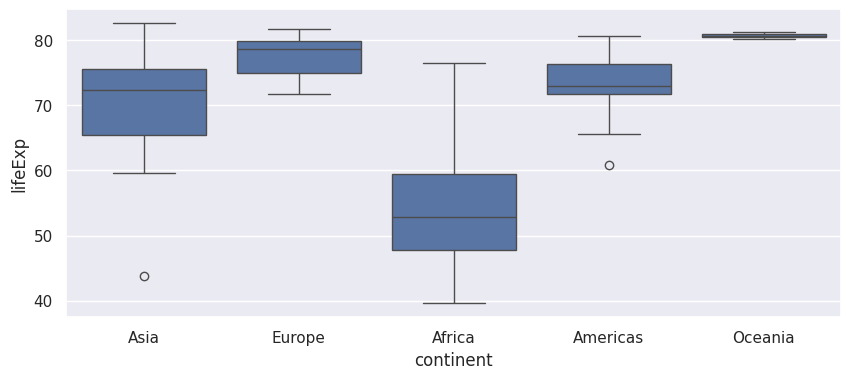

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 4))
y= df[df['year']>2005].lifeExp
sns.boxplot(x= 'continent', y=y,data= df);


Life expectenciy is a lot higher in europe americas and oceania

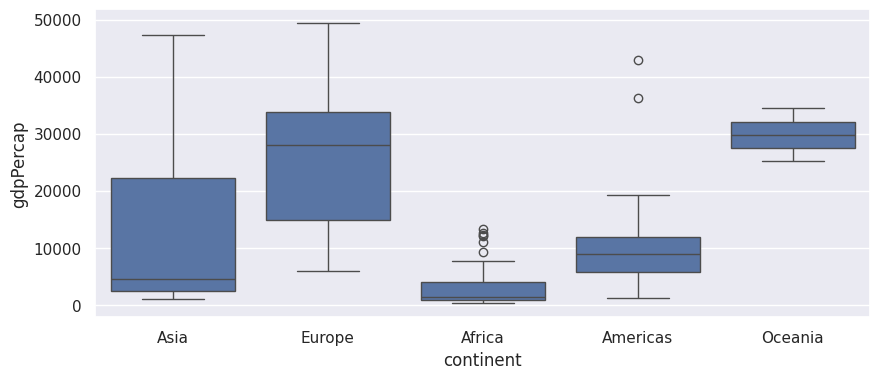

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 4))
y= df[df['year']>2005].gdpPercap
sns.boxplot(x= 'continent', y=y,data= df);


GDP percap is higer in europe oceania and lower in Africa

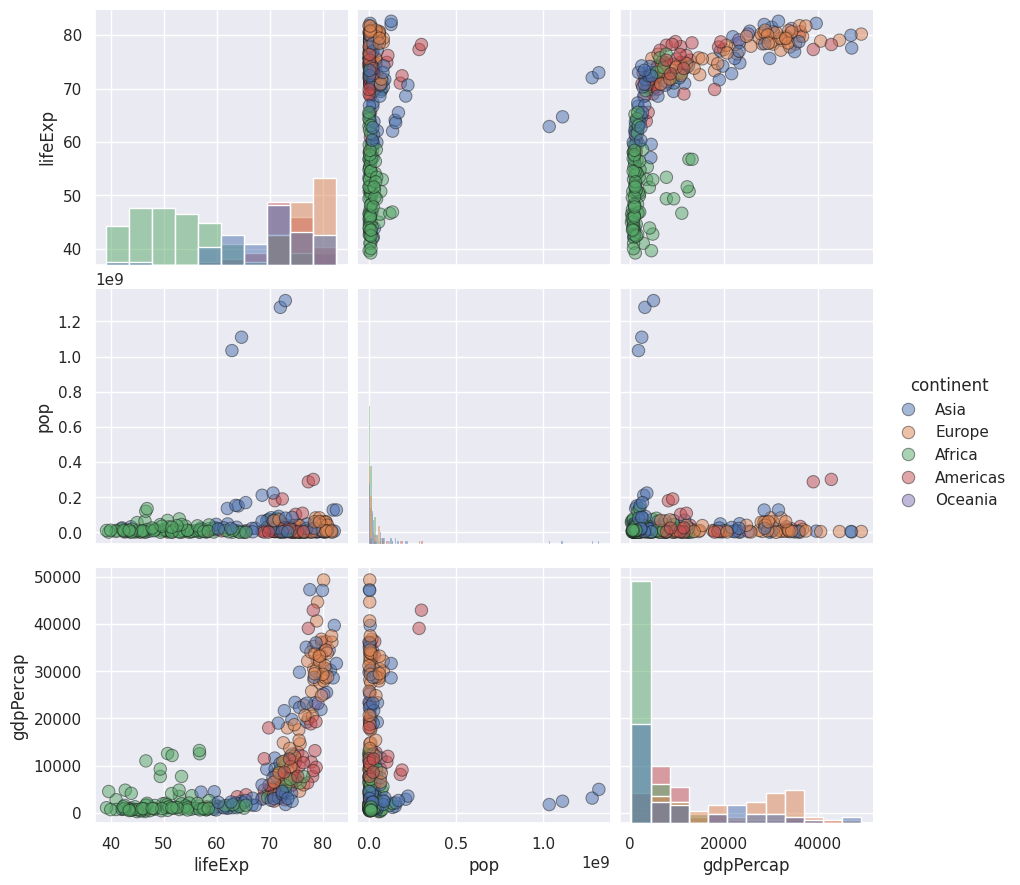

In [ ]:
#looking for outliears
#sreating scatterplot matrix

# Assuming 'df' is your DataFrame
sns.pairplot(
    df[df['year'] >= 2000],
    vars=['lifeExp', 'pop', 'gdpPercap'],
    hue='continent',
    diag_kind='hist',
    plot_kws={'alpha': 0.5, 's': 80, 'edgecolor': 'k'},
    height=3
)
plt.show()


Informative but hard to understand with the breakdown by the continent


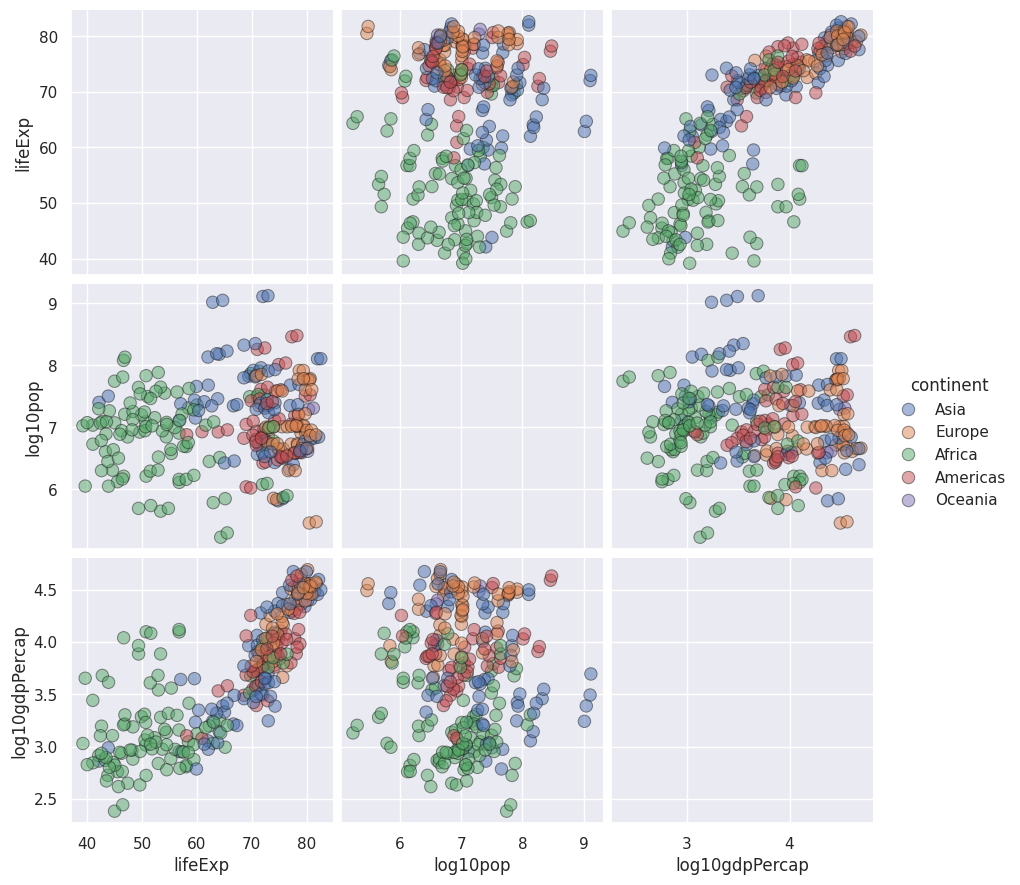

In [ ]:
#log transofrm to beter present the data

# Apply log10 transformation
df['log10pop'] = np.log10(df['pop'])
df['log10gdpPercap'] = np.log10(df['gdpPercap'])

# Create the scatter plot matrix
sns.pairplot(
    df[df['year'] >= 2000],
    vars=['lifeExp', 'log10pop', 'log10gdpPercap'],
    hue='continent',
    diag_kind='kide',
    plot_kws={'alpha': 0.5, 's': 80, 'edgecolor': 'k'},
    height=3);



**Standariziation and normalization
Feature scaling is a method used to normalize range of of independent varaibles of data

In [ ]:
#Standarization brings a features values to a small range centered near by computing Observation - mean / standard deviations which is Z-score
#Z score is a number of stdev from the mean value of the ref population

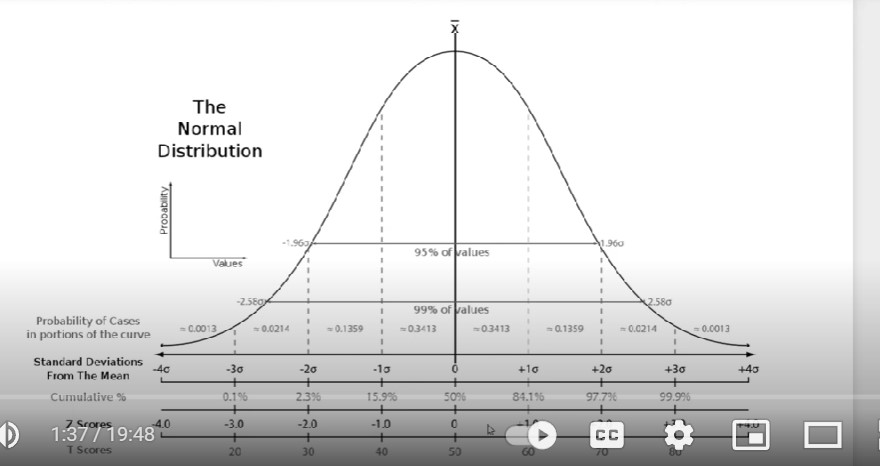

In [ ]:
#range of the raw data varies in ML it willnot work properly withouth normalization
#each feature should contribute proportionally to final dystance


In [ ]:
#feature scaling for https://www.kaggle.com/datasets/borapajo/food-choices


This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. There are 126 responses from students. Data is raw and uncleaned. Cleaning is in the process and as soon as that is done, additional versions of the data will be posted

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
foodchoices= pd.read_csv('/content/food_coded.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
foodchoices.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [2]:
#celaninig the data, stings andnumeric values in the columns Na
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
foodchoices= pd.read_csv('/content/food_coded.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
foodchoices['weigth']= pd.to_numeric(foodchoices['weight'], errors= 'coerce')
foodchoices['GPA']= pd.to_numeric(foodchoices['GPA'], errors= 'coerce')

foodchoices.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,weigth
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187,187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155,155.0
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.,NaN
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240",NaN
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190,190.0


In [3]:
#creating dictionary that will refer to the column of the comfort food and converting the gender
codeconvert = {1:'stress',
               2: 'boredom',
               3: 'depression',
               4:'hunger',
               5: 'lazyness',
               6: 'cold weather',
               7: 'happines',
               8:'watching tv',
               9:'none'}
mfconvert= {1:'female',2:'male'}
foodchoices['comfort_food_reason']= foodchoices.apply(lambda x: codeconvert.get(x['comfort_food_reasons_coded']), axis=1)
foodchoices['gender']= foodchoices.apply(lambda x: mfconvert.get(x['Gender']), axis=1)
foodchoices.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,weigth,comfort_food_reason,gender
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187,187.0,none,male
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155,155.0,stress,female
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.,NaN,stress,female
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240",NaN,boredom,female
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190,190.0,stress,female


<Axes: xlabel='weight', ylabel='comfort_food_reason'>

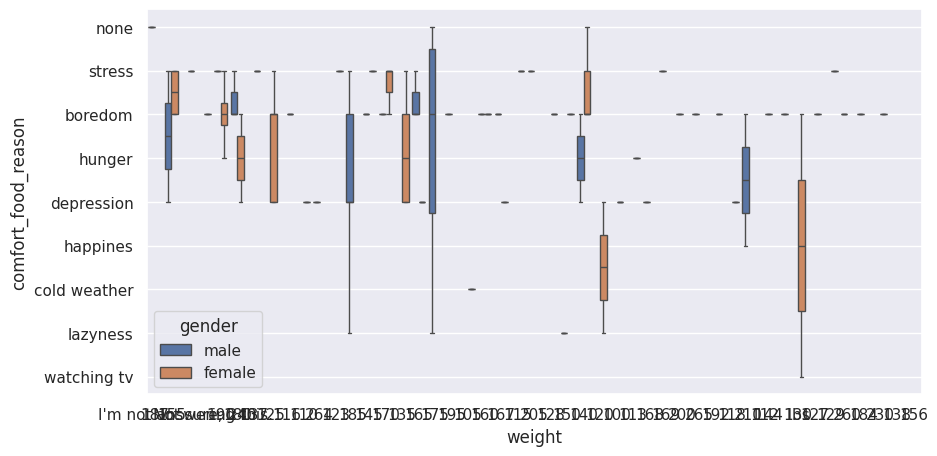

In [4]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set(style='darkgrid')
plt.figure(figsize= (10,5))
sns.boxplot(x='weight', y='comfort_food_reason', hue= 'gender', data= foodchoices)

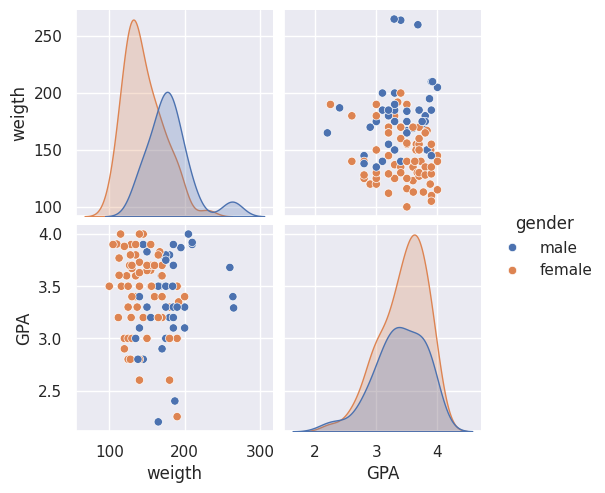

In [5]:
sns.pairplot(data= foodchoices, vars= ['weigth', 'GPA'], hue= "gender");

other ways to visualize

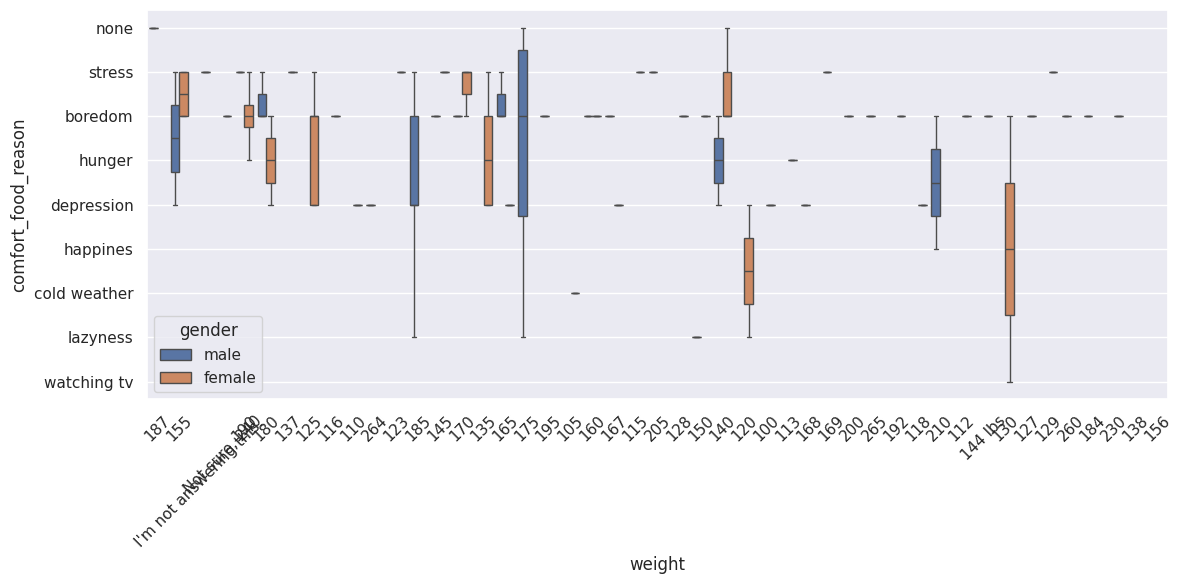

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming foodchoices DataFrame is already created and processed

sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))  # Adjust the figure size if necessary

# Create the boxplot
sns.boxplot(x='weight', y='comfort_food_reason', hue='gender', data=foodchoices)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout to ensure everything fits within the figure
plt.tight_layout()

# Display the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

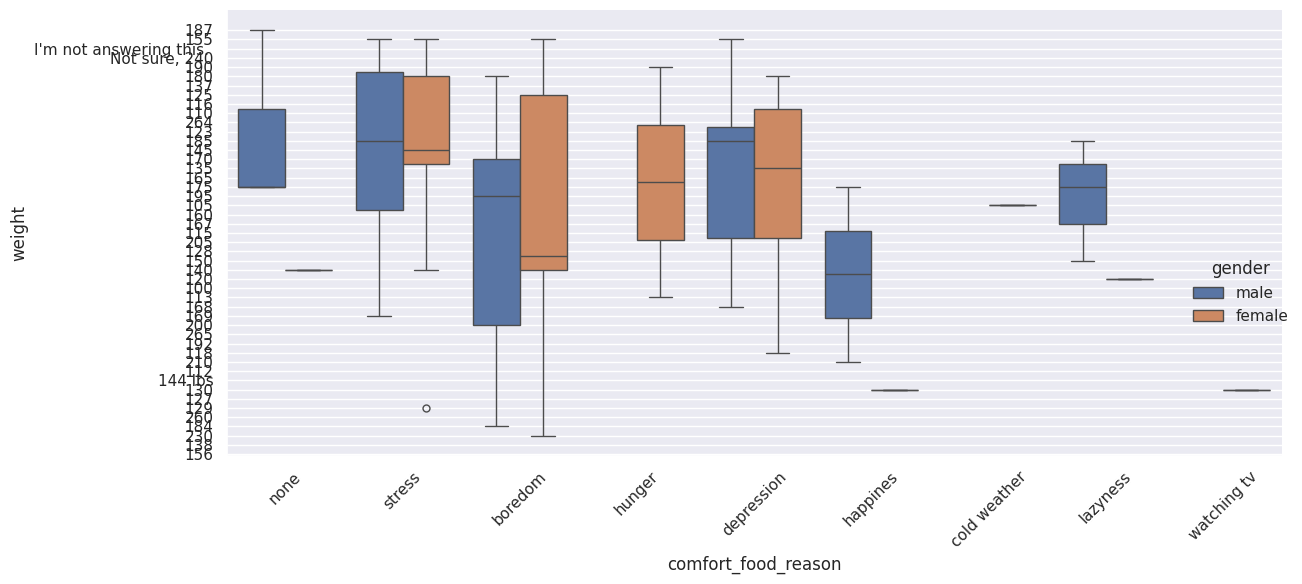

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming foodchoices DataFrame is already created and processed

sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))  # Adjust the figure size if necessary

# Create the boxplot with grouped bars for females and males
sns.catplot(x='comfort_food_reason', y='weight', hue='gender', kind='box', data=foodchoices, height=6, aspect=2)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout to ensure everything fits within the figure
plt.tight_layout()

# Show the plot
plt.show()


Standardize the data


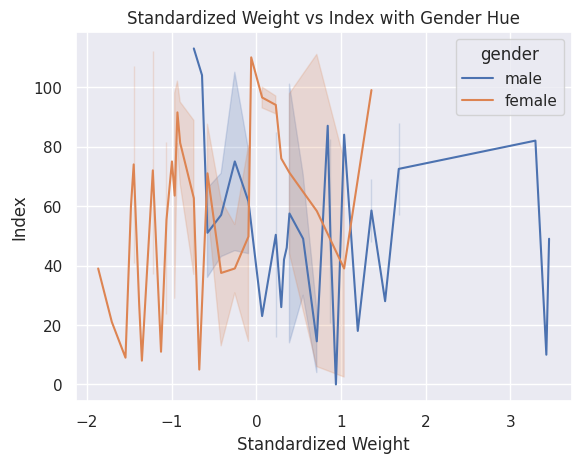

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


# Convert non-numeric values to NaN and then drop them
foodchoices['weight'] = pd.to_numeric(foodchoices['weight'], errors='coerce')
foodchoices['GPA'] = pd.to_numeric(foodchoices['GPA'], errors='coerce')
foodchoices.dropna(subset=['weight', 'GPA'], inplace=True)

# Standardize the data
standardized = preprocessing.scale(foodchoices[['weight', 'GPA']])

# Output the standardized data as a DataFrame
std = pd.DataFrame(standardized, columns=['weight', 'GPA'])
std['gender'] = foodchoices['gender'].values

# Plot the data
sns.lineplot(x='weight', y=std.index.values, hue='gender', data=std)
plt.xlabel('Standardized Weight')
plt.ylabel('Index')
plt.title('Standardized Weight vs Index with Gender Hue')
plt.show()


<ipython-input-19-4e1e7cbb18d5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=std, shade= True, x='weight', hue='gender', fill=True)


<Axes: xlabel='weight', ylabel='Density'>

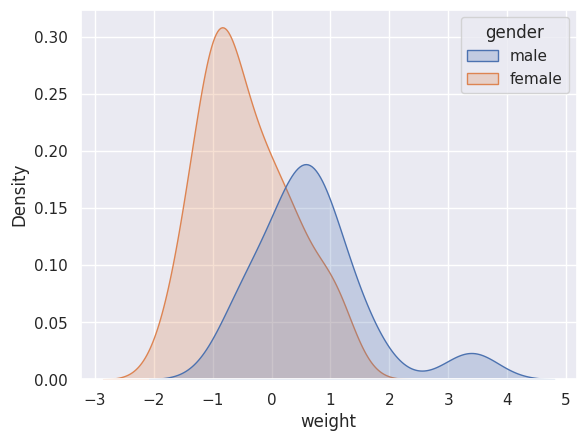

In [19]:
#little cofusing creating kdeplot
sns.kdeplot(data=std, shade= True, x='weight', hue='gender', fill=True)

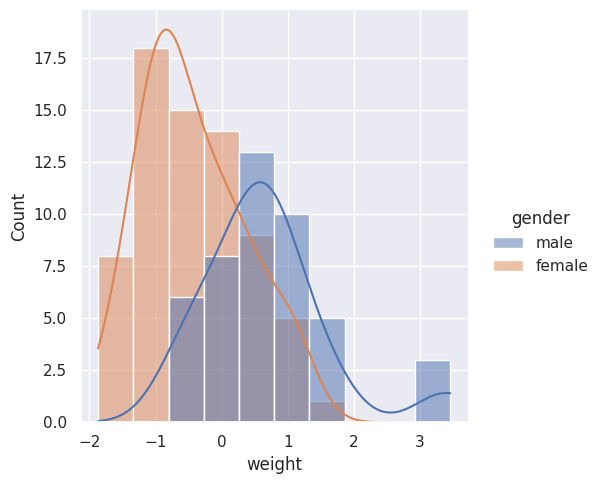

In [20]:
sns.displot(data=std, x='weight', hue='gender', kind='hist', kde
            =True)

Normalization
rescaling the fetures values to the range by computing observations:
(observation-min)/(max-min)

<Axes: xlabel='weight'>

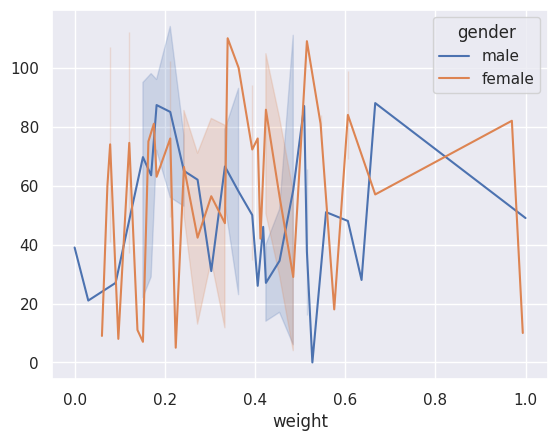

In [22]:
#mid max scaler
normalized = preprocessing.MinMaxScaler().fit_transform(foodchoices[['weight', 'GPA']])
norm= pd.DataFrame(normalized,columns= ["weight", "GPA"])
norm['gender']= foodchoices['gender']

#output the normalized data as a data frame
sns.lineplot(x='weight', y=std.index.values, hue='gender', data=norm)

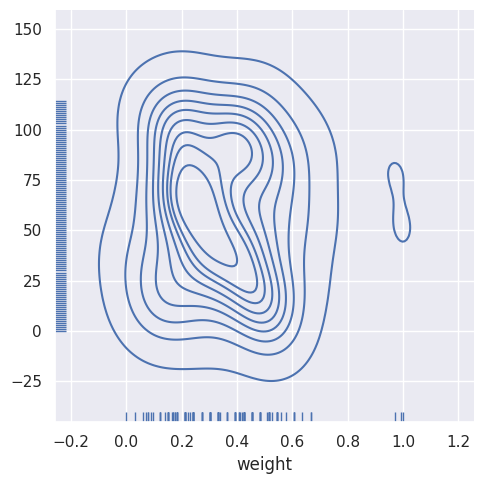

In [24]:
sns.displot(data=norm, x='weight', y=norm.index.values, kind='kde', rug=True)

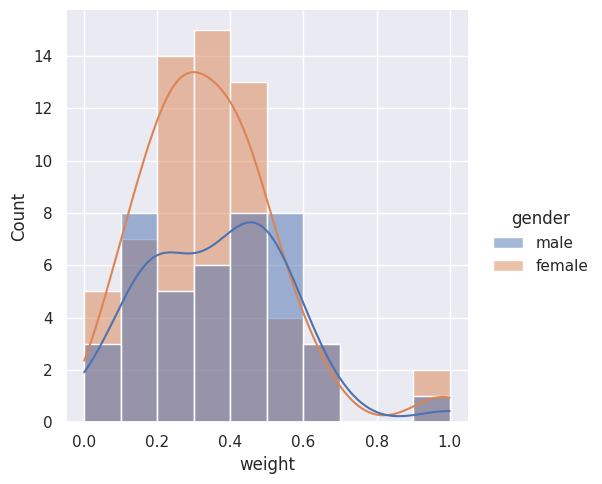

In [26]:
sns.displot(data=norm, x='weight', hue= "gender", kind='hist', kde=True)

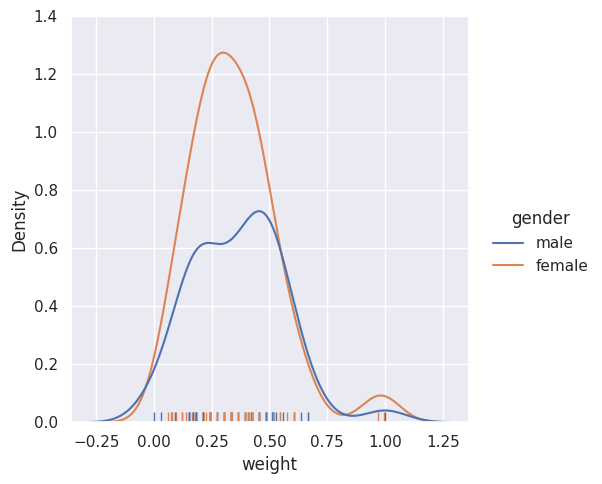

In [27]:
sns.displot(data=norm, x='weight', hue= "gender", kind='kde', rug=True)

## Dimentionality Reduction
##Factor analysis
Factor analysis is a multivariant mathematical technique traditionally used in psychometrics to construct measures of psychologic and behavioral characteristics, such as intellectual abilities or personality traits (12). Theoretically, it addresses the problem of how to analyze the structure of the interrelationship (correlations) among a large number of variables (test scores, questionnaire responses, behavior, symptoms) by identifying a set of underlying dimensions known as factors

https://www.sciencedirect.com/topics/psychology/factor-analysis

Factor analysis to determin the  relation to variables varience covariance, partition to common variance and comonality

Trying to gorup factors into homogenous sets


## **Sport Rankings

ENDURANCE: The ability to continue to perform a skill or action for long periods of time. Example: Lance Armstrong
STRENGTH: The ability to produce force. Example: NFL linebackers.
POWER: The ability to produce strength in the shortest possible time. Example: Barry Bonds.
SPEED: The ability to move quickly. Example: Marion Jones, Maurice Green.
AGILITY: The ability to change direction quickly. Example: Derek Jeter, Mia Hamm.
FLEXIBILITY: The ability to stretch the joints across a large range of motion. Example: Gymnasts, divers.
NERVE: The ability to overcome fear. Example: High-board divers, race-car drivers, ski jumpers.
DURABILITY: The ability to withstand physical punishment over a long period of time. Example: NBA/NHL players.
HAND-EYE COORDINATION: The ability to react quickly to sensory perception. Example: A hitter reacting to a breaking pitch; a drag racer timing acceleration to the green light.
ANALYTIC APTITUDE: The ability to evaluate and react appropriately to strategic situations. Example: Joe Montana reading a defense; basketball point guard on a fast break.

https://www.espn.com/espn/page2/sportSkills?sort=sport#grid

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfog= pd.read_csv('/content/toughestSportbySkill.csv')
dfog.head(20)

,SPORT,END,STR,PWR,SPD,AGI,FLX,NER,DUR,HAN,ANA,TOTAL,RANK
0,Archery,2.88,4.50,3.13,1.13,1.63,2.63,2.75,2.13,6.63,3.25,30.625,55
1,Auto Racing,5.88,3.50,2.63,1.63,2.75,1.75,9.88,4.38,8.00,7.50,47.875,32
2,Badminton,5.25,3.25,4.00,5.63,7.38,5.25,1.25,2.63,7.25,6.13,48.000,30
3,Baseball/Softball,4.63,5.75,7.63,6.50,6.75,4.75,5.13,5.63,9.25,6.25,62.250,9
4,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
5,Billiards,1.00,1.00,1.75,0.75,1.00,2.63,1.63,0.75,5.25,5.75,21.500,59
6,Bobsledding/Luge,3.50,5.50,6.50,6.75,4.13,3.25,7.75,3.50,4.13,4.25,49.250,28
7,Bowling,2.25,2.75,3.38,1.00,1.88,2.38,1.63,1.25,4.75,4.13,25.375,57
8,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
9,Canoe/Kayak,6.75,5.25,5.63,3.50,2.75,3.88,3.63,3.25,3.13,4.25,42.000,49


In [120]:
from factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
s=pd.DataFrame(kmo_all)
s['metrics']= list(df.columns)
display(s)
print('KMO test statistics:', kmo_model)


,0,metrics
0,0.656343,END
1,0.622092,STR
2,0.606138,PWR
3,0.687773,SPD
4,0.666592,AGI
5,0.598282,FLX
6,0.483092,NER
7,0.700033,DUR
8,0.478031,HAN
9,0.678642,ANA


KMO test statistics: 0.6308070085244247


In [121]:
df = dfog.drop(columns=['SPORT','TOTAL','RANK'])
df.head()

,END,STR,PWR,SPD,AGI,FLX,NER,DUR,HAN,ANA
0,2.88,4.50,3.13,1.13,1.63,2.63,2.75,2.13,6.63,3.25
1,5.88,3.50,2.63,1.63,2.75,1.75,9.88,4.38,8.00,7.50
2,5.25,3.25,4.00,5.63,7.38,5.25,1.25,2.63,7.25,6.13
3,4.63,5.75,7.63,6.50,6.75,4.75,5.13,5.63,9.25,6.25
4,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38


In [122]:
df.describe()

,END,STR,PWR,SPD,AGI,FLX,NER,DUR,HAN,ANA
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.077667,5.169000,5.509167,4.815000,4.765000,4.723167,4.614833,4.612833,4.954833,4.767333
std,2.094217,1.715357,1.980397,2.266403,1.927273,1.704369,2.442645,1.882102,1.966328,1.576830
min,1.000000,1.000000,1.250000,0.630000,1.000000,1.130000,0.880000,0.750000,1.880000,2.250000
25%,3.500000,3.880000,4.097500,3.000000,3.437500,3.847500,2.597500,3.380000,3.130000,3.437500
50%,4.630000,5.190000,5.690000,5.130000,4.755000,4.750000,4.190000,4.630000,4.440000,4.250000
75%,6.660000,6.130000,7.130000,6.410000,6.380000,5.532500,6.532500,5.782500,6.630000,6.160000
max,9.630000,9.250000,9.750000,9.880000,8.250000,10.000000,9.880000,8.500000,9.250000,7.500000


In [123]:
df.isnull().sum()

END    0
STR    0
PWR    0
SPD    0
AGI    0
FLX    0
NER    0
DUR    0
HAN    0
ANA    0
dtype: int64

In [124]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [END, STR, PWR, SPD, AGI, FLX, NER, DUR, HAN, ANA]
Index: []


###Scree plot choosing the number of component and the factors to extract


In [125]:
!pip install factor_analyzer


# of columns 10


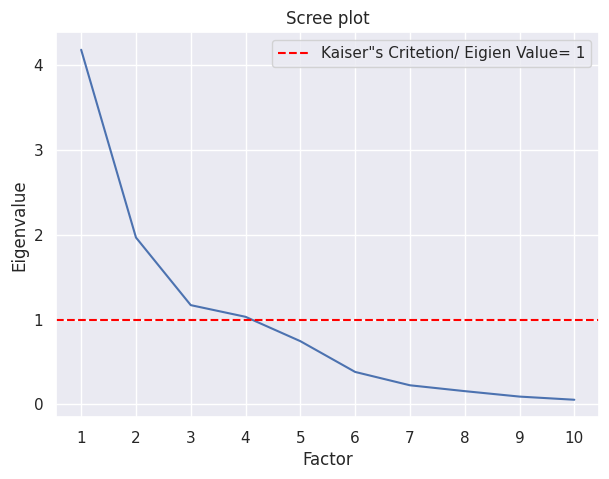

In [126]:
#eigien values working on the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer


print('# of columns', len (df.columns))

fa= FactorAnalyzer( rotation= 'varimax', n_factors = 2)
fa.fit(df)

ev, v= fa.get_eigenvalues()

factors = list (range(1,len(list(df)) + 1 ))
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize= (7,5))
sns.lineplot(x=factors, y=ev, ax=ax);
ax.set(xlabel= 'Factors')
ax.axhline(y=1, label= 'Kaiser"s Critetion/ Eigien Value= 1' , linestyle='--', color= 'red')
ax.legend()
plt.title('Scree plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.xticks(factors)
plt.show()

Take the elbo values 234 befroe leveling off

### Kaiser -Meyer Olkin Measure of sampling adequacy
## represents the portion of variance in the variables that might be cauesd by underlying factors


In [140]:

from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd

# Assuming df is already defined
kmo_all, kmo_model = calculate_kmo(df)

# Create a DataFrame from kmo_all
s = pd.DataFrame(kmo_all, columns=['KMO'])
s['Metrics'] = list(df.columns)

# Display the DataFrame
display(s)

# Print KMO test statistics
print('KMO test statistics:', kmo_model)



,KMO,Metrics
0,0.656343,END
1,0.622092,STR
2,0.606138,PWR
3,0.687773,SPD
4,0.666592,AGI
5,0.598282,FLX
6,0.483092,NER
7,0.700033,DUR
8,0.478031,HAN
9,0.678642,ANA


KMO test statistics: 0.6308070085244247


In [139]:
#determin the factorl loadings and comminality for each variable
import pandas as pd
from factor_analyzer import FactorAnalyzer

import seaborn as sns

factors = 2
factorlist = []
for i in range(factors):
  factorlist.append(f'Factor {i+1}')


#build the factor model
fa= FactorAnalyzer(rotation= "varimax", n_factors = factors)
fa.fit(df)

fa.loadings_
loadings= pd.DataFrame(fa.loadings_, columns= factorlist, index= df.columns)

print('Factor Loadings: \n', loadings)

#obtain the communalities
fa.get_communalities()
communalities = pd.DataFrame(fa.get_communalities(), index= df. columns)
print('\nCommunalities \n%s' %communalities)

Factor Loadings: 
      Factor 1  Factor 2
END  0.552104  0.170374
STR  0.872471 -0.233108
PWR  0.783427 -0.043385
SPD  0.686814  0.171046
AGI  0.627261  0.593390
FLX  0.473421  0.071507
NER  0.341474  0.060328
DUR  0.828454  0.181362
HAN -0.031178  0.831590
ANA  0.113019  0.817755

Communalities 
            0
END  0.333846
STR  0.815545
PWR  0.615640
SPD  0.500970
AGI  0.745568
FLX  0.229241
NER  0.120244
DUR  0.719229
HAN  0.692514
ANA  0.681497


In [129]:
#for better reading
loadings['communality']= fa.get_communalities()
loadings.sort_values(by= 'communality', ascending= False)


,Factor 1,Factor 2,communality
STR,0.872471,-0.233108,0.815545
AGI,0.627261,0.593390,0.745568
DUR,0.828454,0.181362,0.719229
HAN,-0.031178,0.831590,0.692514
ANA,0.113019,0.817755,0.681497
PWR,0.783427,-0.043385,0.615640
SPD,0.686814,0.171046,0.500970
END,0.552104,0.170374,0.333846
FLX,0.473421,0.071507,0.229241
NER,0.341474,0.060328,0.120244


In [ ]:
#F1 0.7 in POwer strongly influances the follwing varaible
##communality  the value for com can be greater than one so to few factors choosen


In [130]:
#factor model with 3 factors

import pandas as pd
from factor_analyzer import FactorAnalyzer

import seaborn as sns

factors = 3
factorlist = []
for i in range(factors):
  factorlist.append(f'Factor {i+1}')


#build the factor model
fa= FactorAnalyzer(rotation= "varimax", n_factors = factors)
fa.fit(df)

fa.loadings_
loadings= pd.DataFrame(fa.loadings_, columns= factorlist, index= df.columns)

print('Factor Loadings: \n', loadings)

#obtain the communalities
fa.get_communalities()
communalities = pd.DataFrame(fa.get_communalities(), index= df. columns)
print('\nCommunalities \n%s' %communalities)

Factor Loadings: 
      Factor 1  Factor 2  Factor 3
END  0.497374  0.146816  0.240450
STR  0.679738 -0.257510  0.510482
PWR  0.747310 -0.082854  0.249456
SPD  0.859336  0.128494 -0.027344
AGI  0.682080  0.568212  0.115481
FLX  0.471973  0.045945  0.127507
NER  0.067284  0.066289  0.616145
DUR  0.548700  0.168772  0.825068
HAN  0.016241  0.819088 -0.030774
ANA  0.064170  0.837439  0.166523

Communalities 
            0
END  0.326752
STR  0.788947
PWR  0.627565
SPD  0.755716
AGI  0.801434
FLX  0.241127
NER  0.388556
DUR  1.010293
HAN  0.672116
ANA  0.733151


In [131]:
#for better reading
loadings['communality']= fa.get_communalities()
loadings.sort_values(by= 'communality', ascending= False)

,Factor 1,Factor 2,Factor 3,communality
DUR,0.548700,0.168772,0.825068,1.010293
AGI,0.682080,0.568212,0.115481,0.801434
STR,0.679738,-0.257510,0.510482,0.788947
SPD,0.859336,0.128494,-0.027344,0.755716
ANA,0.064170,0.837439,0.166523,0.733151
HAN,0.016241,0.819088,-0.030774,0.672116
PWR,0.747310,-0.082854,0.249456,0.627565
NER,0.067284,0.066289,0.616145,0.388556
END,0.497374,0.146816,0.240450,0.326752
FLX,0.471973,0.045945,0.127507,0.241127


In [141]:
# Renaming factor 1 and 2 to physical and tech
loadings = loadings.reset_index(drop=False)

loadings = loadings.rename(columns={'index': 'Metrics'})
loadings = loadings.rename(columns={'Factor 1': 'Physical', 'Factor 2': 'Technical'})



# Melting the DataFrame
dfnew = loadings.melt(id_vars="Metrics", var_name='Factors', value_name='val')
dfnew= dfnew.rename(columns={'val': 'Value'})

dfnew = dfnew[dfnew['Factors'] != 'communality']
dfnew = dfnew[dfnew['Factors'] != "communality"].sort_values(by=['Factors', 'Value', 'Metrics'], ascending=True)
dfnew['Value'] = dfnew['Value'] * 100


In [142]:
dfnew.head(10)

,Metrics,Factors,Value
8,HAN,Physical,-3.117771
9,ANA,Physical,11.301936
6,NER,Physical,34.147374
5,FLX,Physical,47.342103
0,END,Physical,55.210360
4,AGI,Physical,62.726066
3,SPD,Physical,68.681424
2,PWR,Physical,78.342698
7,DUR,Physical,82.845437
1,STR,Physical,87.247117


Text(0.5, 1.0, 'Factor Loadings')

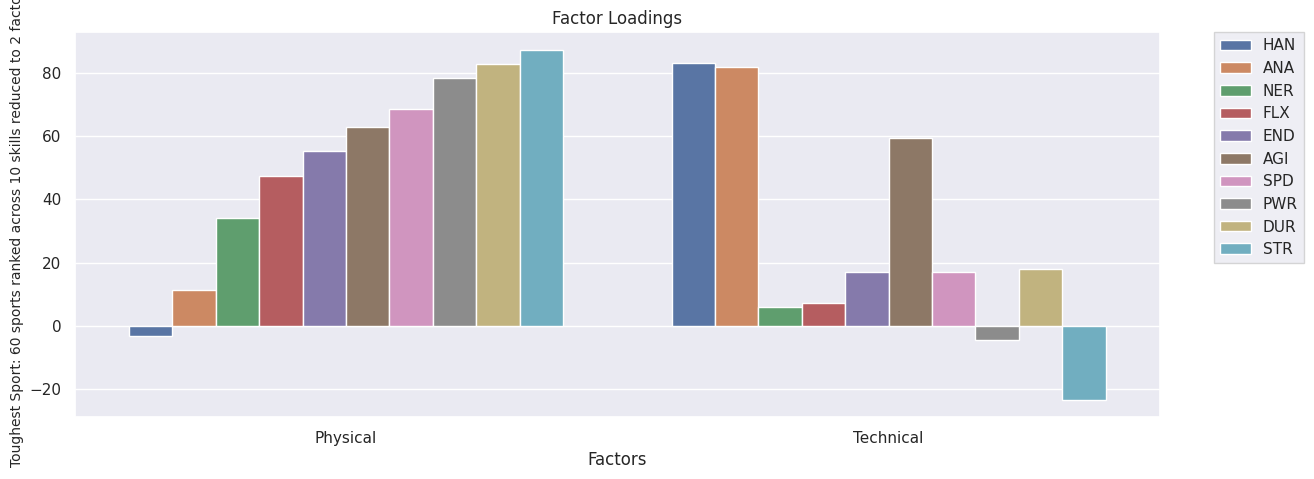

In [145]:
#ploting
fig, ax= plt.subplots(figsize= (14,5))

#make barplot
sns.barplot(x= 'Factors', y= 'Value', hue= 'Metrics', data= dfnew, ax= ax)

#set labels
ax.legend(bbox_to_anchor= (1.05,1), loc= 'upper left', borderaxespad=0., fancybox=False, shadow= False, ncol=1)
ax.set_xlabel('Factors')
ax.set_ylabel('Toughest Sport: 60 sports ranked across 10 skills reduced to 2 factors', size=10)
ax.set_title('Factor Loadings')
